In [1]:
import os 
os.chdir("D:\CSE 4 PROJECT")

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,                   
                                   validation_split=0.2)

In [3]:
import PIL
from PIL import Image
from skimage import io
import tensorflow as rf
import tensorflow_datasets  as tfds
  

In [4]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False

In [5]:
import cv2
import numpy as np

In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
#from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [7]:
from imutils import paths
import cv2


In [8]:
imagePaths=list(paths.list_images("D:\CSE 4 PROJECT"))

In [9]:
(imagePaths)

['D:\\CSE 4 PROJECT\\train_image\\000c1434d8d7.png',
 'D:\\CSE 4 PROJECT\\train_image\\001639a390f0.png',
 'D:\\CSE 4 PROJECT\\train_image\\0024cdab0c1e.png',
 'D:\\CSE 4 PROJECT\\train_image\\002c21358ce6.png',
 'D:\\CSE 4 PROJECT\\train_image\\005b95c28852.png',
 'D:\\CSE 4 PROJECT\\train_image\\0083ee8054ee.png',
 'D:\\CSE 4 PROJECT\\train_image\\0097f532ac9f.png',
 'D:\\CSE 4 PROJECT\\train_image\\00a8624548a9.png',
 'D:\\CSE 4 PROJECT\\train_image\\00b74780d31d.png',
 'D:\\CSE 4 PROJECT\\train_image\\00cb6555d108.png',
 'D:\\CSE 4 PROJECT\\train_image\\00cc2b75cddd.png',
 'D:\\CSE 4 PROJECT\\train_image\\00e4ddff966a.png',
 'D:\\CSE 4 PROJECT\\train_image\\00f6c1be5a33.png',
 'D:\\CSE 4 PROJECT\\train_image\\0104b032c141.png',
 'D:\\CSE 4 PROJECT\\train_image\\0124dffecf29.png',
 'D:\\CSE 4 PROJECT\\train_image\\0125fbd2e791.png',
 'D:\\CSE 4 PROJECT\\train_image\\012a242ac6ff.png',
 'D:\\CSE 4 PROJECT\\train_image\\014508ccb9cb.png',
 'D:\\CSE 4 PROJECT\\train_image\\0151781fe50b

In [10]:
print('CWD is ',os.getcwd()) #current working directory

CWD is  D:\CSE 4 PROJECT


In [11]:
def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    train_dir = os.path.join('./','train_image/')
    test_dir = os.path.join('./','test_images/')
    
    train['file_path'] = train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
    test['file_path'] = test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))
    
    train['file_name'] = train["id_code"].apply(lambda x: x + ".png")
    test['file_name'] = test["id_code"].apply(lambda x: x + ".png")
    
    train['diagnosis'] = train['diagnosis'].astype(str)
    
    return train,test

In [12]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train

(3662, 4) (1928, 3) 



id_code diagnosis                       file_path         file_name
0     000c1434d8d7         2  ./train_image/000c1434d8d7.png  000c1434d8d7.png
1     001639a390f0         4  ./train_image/001639a390f0.png  001639a390f0.png
2     0024cdab0c1e         1  ./train_image/0024cdab0c1e.png  0024cdab0c1e.png
3     002c21358ce6         0  ./train_image/002c21358ce6.png  002c21358ce6.png
4     005b95c28852         0  ./train_image/005b95c28852.png  005b95c28852.png
...            ...       ...                             ...               ...
3657  ffa47f6a7bf4         2  ./train_image/ffa47f6a7bf4.png  ffa47f6a7bf4.png
3658  ffc04fed30e6         0  ./train_image/ffc04fed30e6.png  ffc04fed30e6.png
3659  ffcf7b45f213         2  ./train_image/ffcf7b45f213.png  ffcf7b45f213.png
3660  ffd97f8cd5aa         0  ./train_image/ffd97f8cd5aa.png  ffd97f8cd5aa.png
3661  ffec9a18a3ce         2  ./train_image/ffec9a18a3ce.png  ffec9a18a3ce.png

[3662 rows x 4 columns]

In [13]:
import keras
from keras import applications
from keras import preprocessing 
#from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [18]:
def plot_classes(df):
    df_group = pd.DataFrame(df.groupby('diagnosis').agg('size').reset_index())
    df_group.columns = ['diagnosis','count']

    #setting the barplot to visualize o/p class distribution 
    sns.set(rc={'figure.figsize':(10,5)}, style = 'whitegrid')
    
    #construct a barplot by setting x -axis as diagnosis and y-axis as count and color_palatte->Blues_d(dark)
    sns.barplot(x = 'diagnosis',y='count',data = df_group)
    plt.title('Output Class Distribution')
    plt.show() 

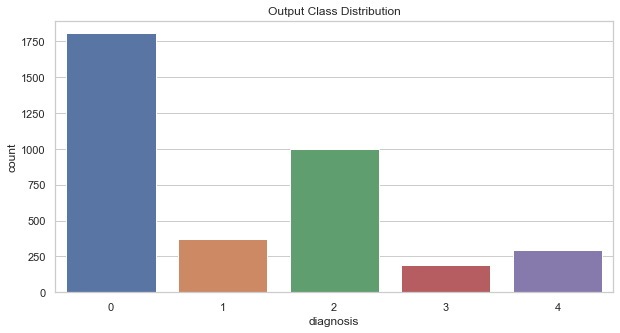

In [19]:
plot_classes(df_train)

In [24]:
IMG_SIZE = 3000

In [25]:
def conv_gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    return img
  

In [26]:
def visualize_imgs(df,pts_per_class,color_scale):
    df = df.groupby('diagnosis',group_keys = False).apply(lambda df: df.sample(pts_per_class))
    df = df.reset_index(drop = True)
    
    plt.rcParams["axes.grid"] = False
    for pt in range(pts_per_class):
        f, axarr = plt.subplots(1,5,figsize = (15,15))
        axarr[0].set_ylabel("Sample Data Points")
        
        df_temp = df[df.index.isin([pt + (pts_per_class*0),pt + (pts_per_class*1), pt + (pts_per_class*2),pt + (pts_per_class*3),pt + (pts_per_class*4)])]
        #print(df_temp)
        for i in range(5):
            if color_scale == 'gray':
                img = conv_gray(cv2.imread(df_temp.file_path.iloc[i]))
                axarr[i].imshow(img,cmap = color_scale)
            else:
                axarr[i].imshow(Image.open(df_temp.file_path.iloc[i]).resize((IMG_SIZE,IMG_SIZE)))
            axarr[i].set_xlabel('Class '+str(df_temp.diagnosis.iloc[i]))

        #plt.show()

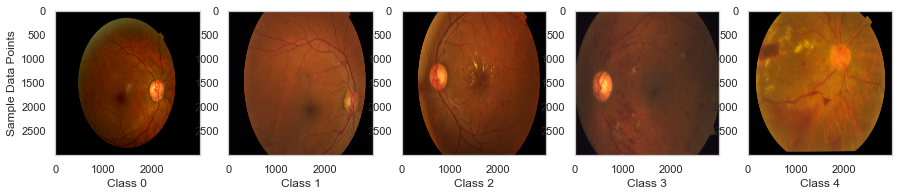

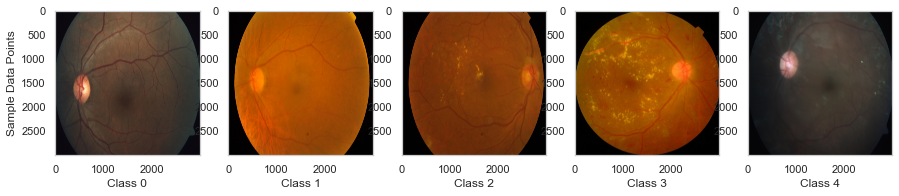

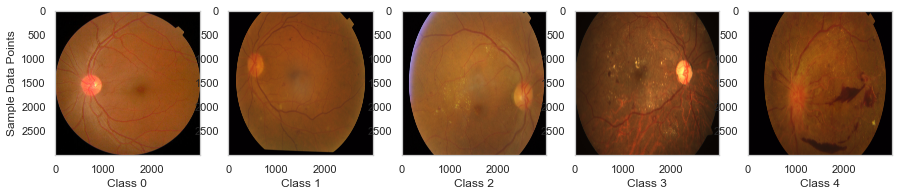

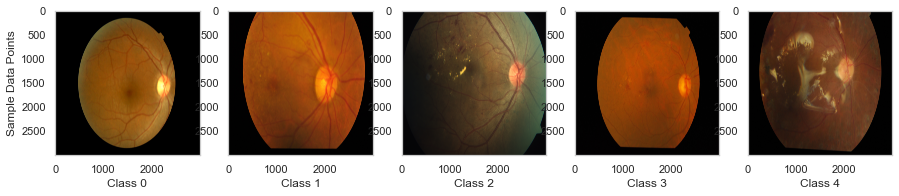

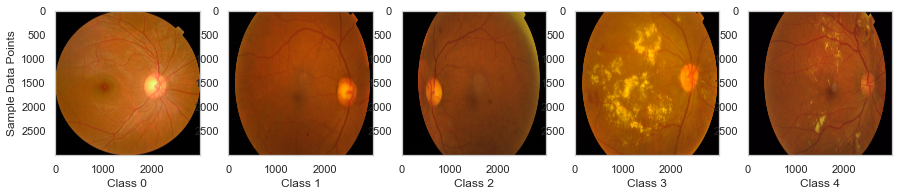

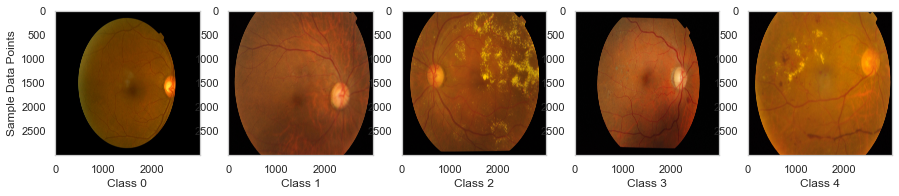

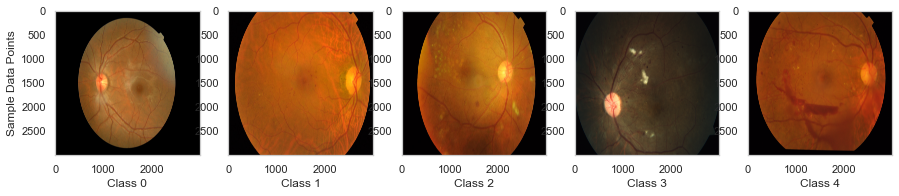

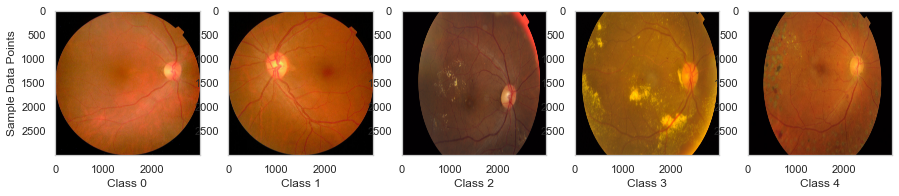

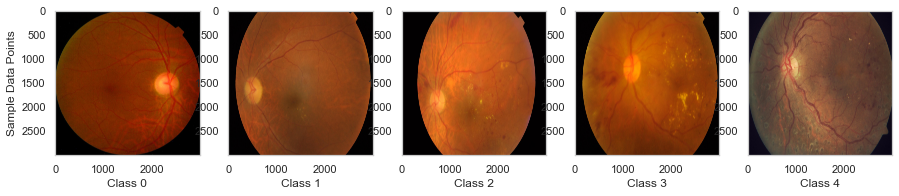

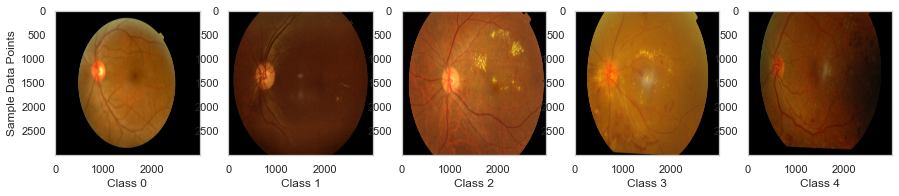

In [27]:
visualize_imgs(df_train,10,color_scale = None)

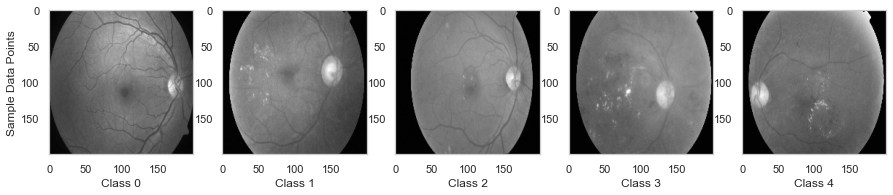

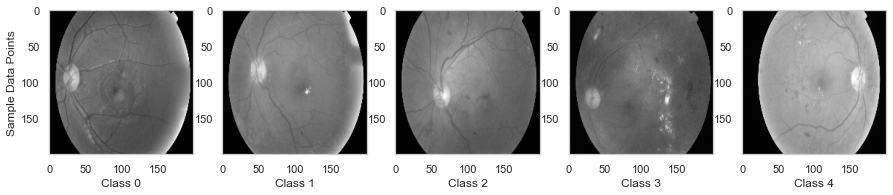

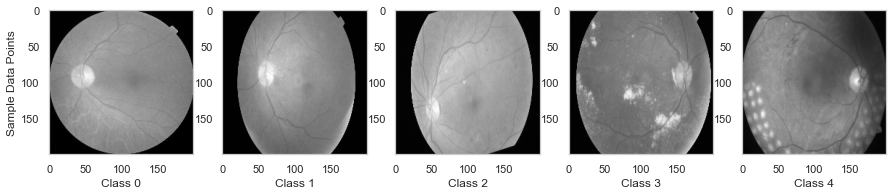

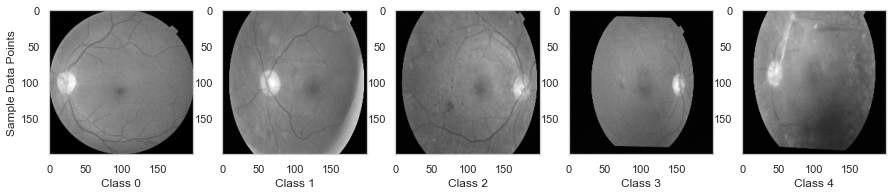

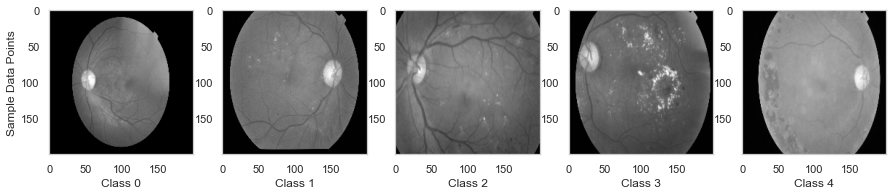

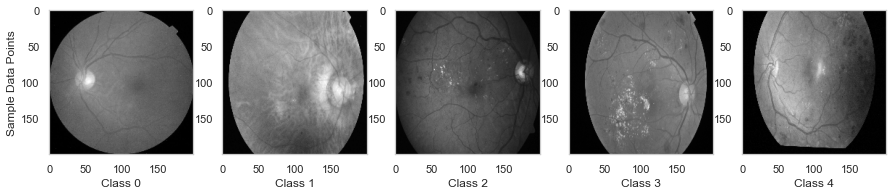

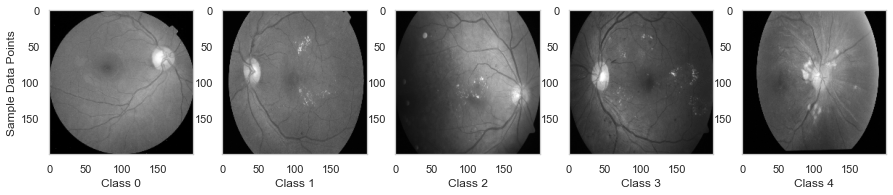

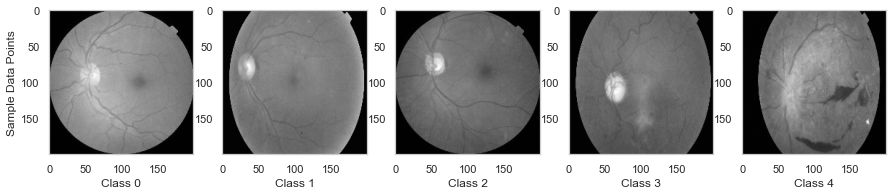

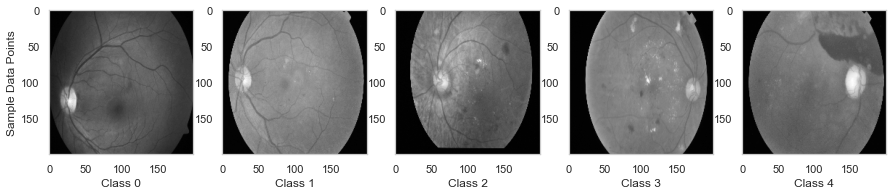

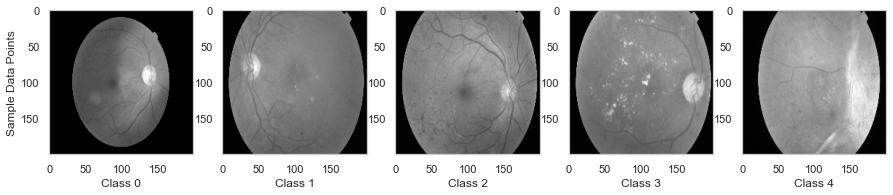

In [20]:
visualize_imgs(df_train,10,color_scale = 'gray')

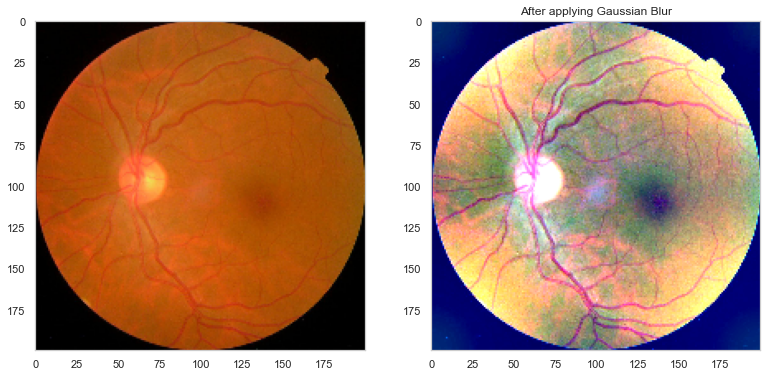

In [24]:
rn = np.random.randint(low = 0,high = len(df_train) - 1)

img = cv2.imread(df_train.file_path.iloc[rn])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (13,13)) #for plotting many images in a single figure f-figure
                                            # axarr->axes
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()


In [27]:
df_train.file_path.iloc[1]

'./train_image/001639a390f0.png'

In [38]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [39]:
def circle_crop(img, sigmaX):   
      
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

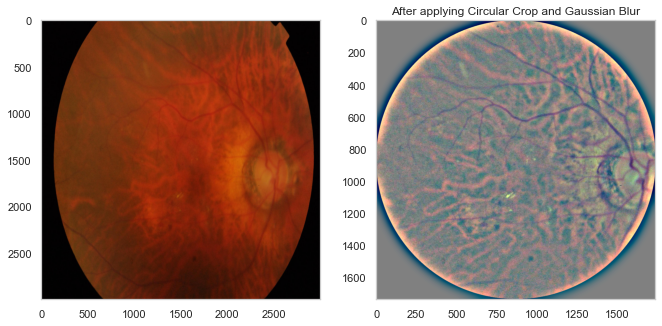

In [40]:
rn = np.random.randint(low = 0,high = len(df_train) - 1)

#img = img_t
img = cv2.imread(df_train.file_path.iloc[rn])
img_t = circle_crop(img,sigmaX = 30)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(IMG_SIZE,IMG_SIZE)))
axarr[1].imshow(img_t)
plt.title('After applying Circular Crop and Gaussian Blur')
# print(f)
plt.show()

In [41]:
def visualize_img_process(df,pts_per_class,sigmaX):
    df = df.groupby('diagnosis',group_keys = False).apply(lambda df: df.sample(pts_per_class))
    df = df.reset_index(drop = True)
    
    plt.rcParams["axes.grid"] = False
    for pt in range(pts_per_class):
        f, axarr = plt.subplots(1,5,figsize = (15,15))
        axarr[0].set_ylabel("Sample Data Points")
        
        df_temp = df[df.index.isin([pt + (pts_per_class*0),pt + (pts_per_class*1), pt + (pts_per_class*2),pt + (pts_per_class*3),pt + (pts_per_class*4)])]
        for i in range(5):
            img = cv2.imread(df_temp.file_path.iloc[i])
            img = circle_crop(img,sigmaX)
            axarr[i].imshow(img)
            axarr[i].set_xlabel('Class '+str(df_temp.diagnosis.iloc[i]))

        plt.show()

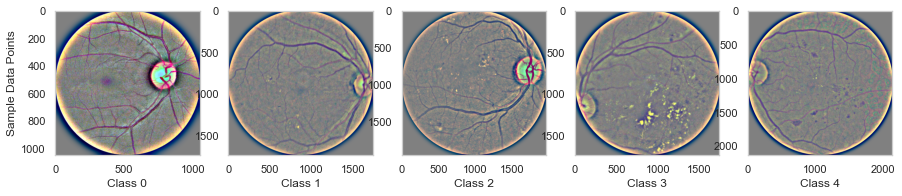

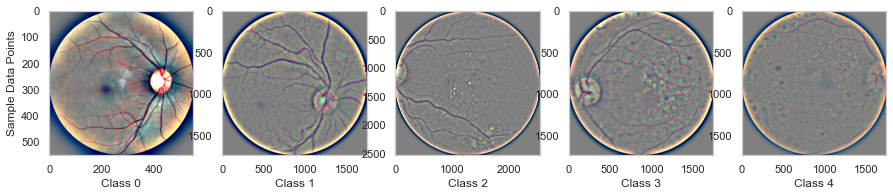

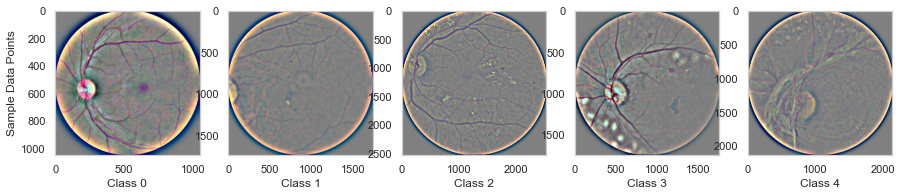

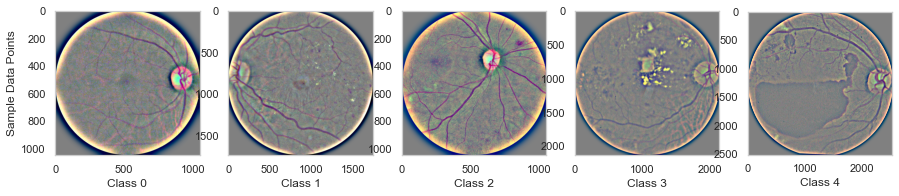

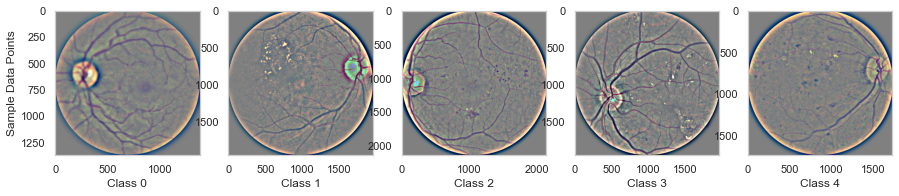

In [42]:
visualize_img_process(df_train,5,sigmaX = 30)

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle

In [45]:
npix = 224 # resize to npix x npix (for now)
X_train = np.zeros((df_train.shape[0], npix, npix))
for i in tqdm_notebook(range(df_train.shape[0])):
    # load an image
    img = cv2.imread(df_train.file_path.iloc[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    X_train[i, :, :] = cv2.resize(img, (npix, npix)) 
    
print("X_train shape: " + str(np.shape(X_train)))   

  0%|          | 0/3662 [00:00<?, ?it/s]

X_train shape: (3662, 224, 224)


In [46]:
# normalize
X = X_train / 255

# reshape
X = X.reshape(X.shape[0], -1)
trainy = df_train['diagnosis']


  0%|          | 0/8 [00:00<?, ?it/s]

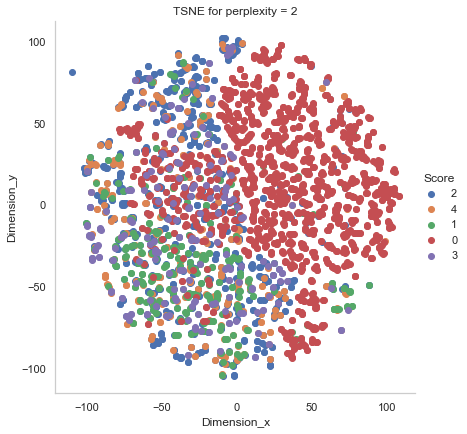

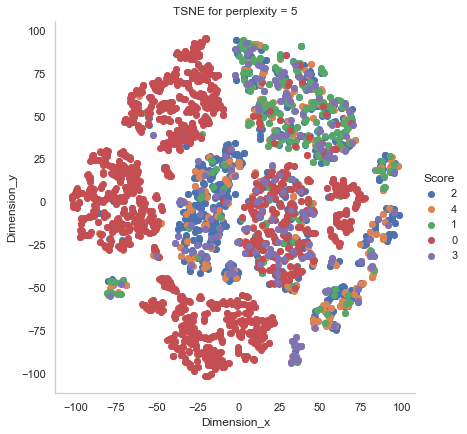

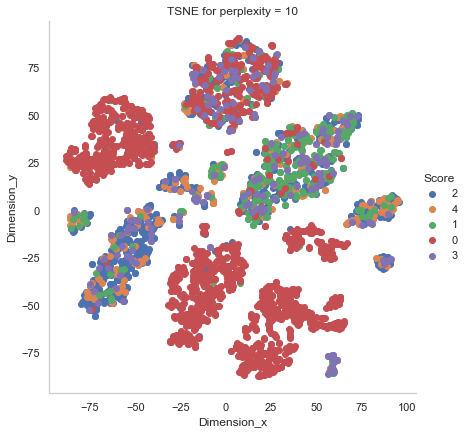

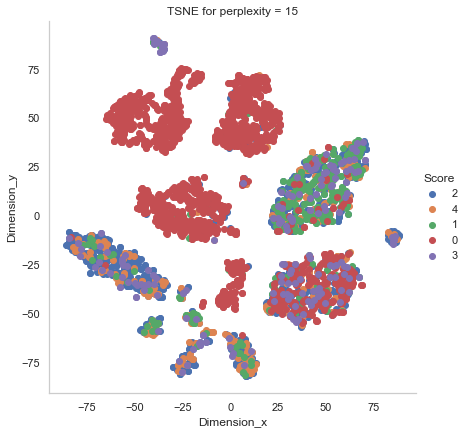

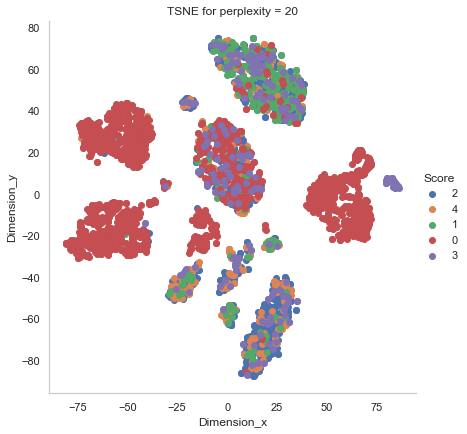

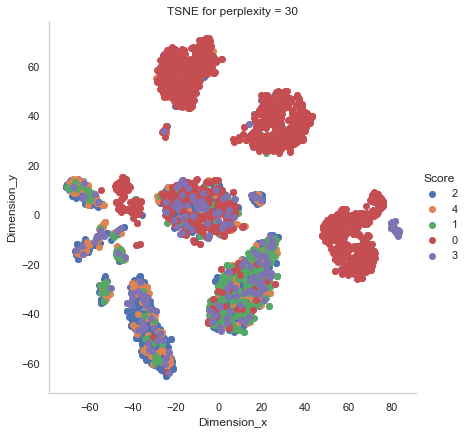

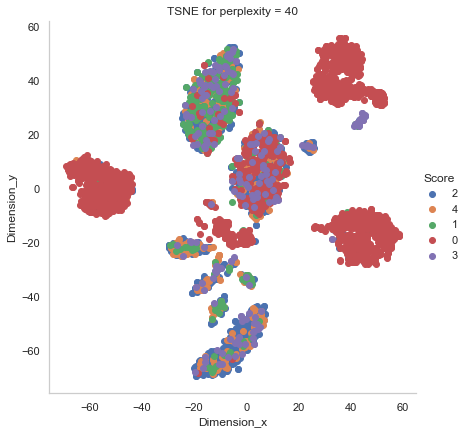

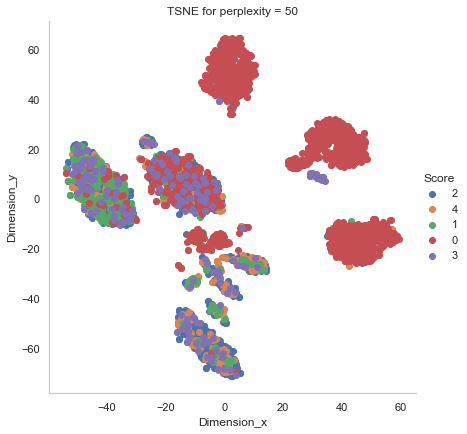

In [47]:
per_vals = [2,5,10,15,20,30,40,50]

for per in tqdm_notebook(per_vals):
    X_decomposed = TSNE(n_components=2,perplexity = per).fit_transform(X)
    df_tsne = pd.DataFrame(data=X_decomposed, columns=['Dimension_x','Dimension_y'])
    df_tsne['Score'] = trainy.values
    
    sns.FacetGrid(df_tsne, hue='Score', size=6).map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
    plt.title('TSNE for perplexity = ' + str(per))
    plt.show()

In [49]:
def generate_augmentations(lim):
    datagen = ImageDataGenerator(featurewise_center=True,
                                 featurewise_std_normalization=True,
                                 rotation_range=20,
                                 #width_shift_range=0.2,
                                 #height_shift_range=0.2,
                                 horizontal_flip=True)
    img = cv2.imread(df_train.file_path.iloc[np.random.randint(low = 0,high = len(df_train) - 1)])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.title('ORIGINAL IMAGE')
    plt.show()
    
    img_arr = img.reshape((1,) + img.shape)
    
    i = 0
    for img_iterator in datagen.flow(x = img_arr,batch_size = 1):
        i = i + 1
        if i > lim:
            break
        plt.imshow((img_iterator.reshape(img_arr[0].shape)).astype(np.uint8))
        plt.title('IMAGE AUGMENTATION ' + str(i))
        plt.show() 

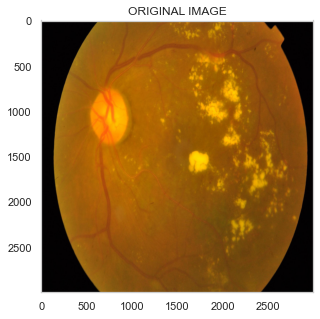

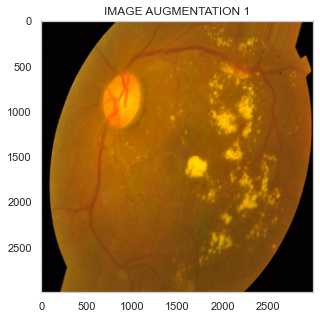

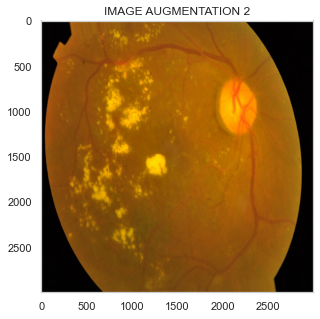

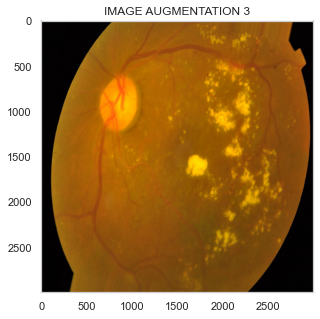

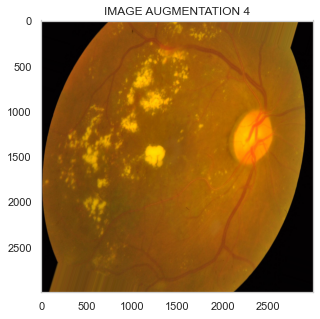

In [50]:
generate_augmentations(4)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_train_train,df_train_valid = train_test_split(df_train,test_size = 0.2)
print(df_train_train.shape,df_train_valid.shape)

(2929, 4) (733, 4)


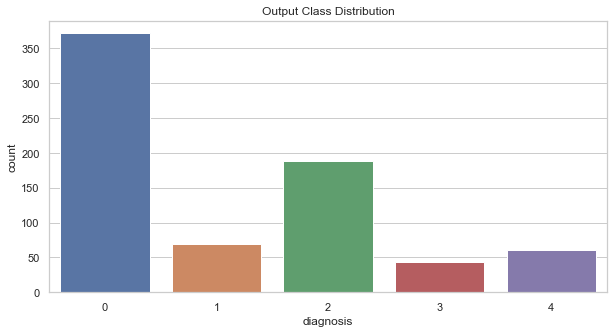

In [54]:
plot_classes(df_train_valid)

In [94]:
import multiprocessing
from multiprocessing.pool import ThreadPool

In [95]:
IMG_SIZE  = 512

In [63]:
def image_resize_save(file):
    input_filepath = os.path.join('./','train_image','{}.png'.format(file))
    output_filepath = os.path.join('./','valid_images_resized','{}.png'.format(file))
    img = cv2.imread(input_filepath)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [64]:
def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(image_resize_save, imgs)
    return results

In [65]:
multiprocess_image_downloader(6, list(df_train_valid.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [62]:
df_train_valid.id_code

584     2927665214e1
1506    69f43381317b
2689    b9d0b83d70c3
233     1116271db4ea
775     37c4dfe03aba
            ...     
1633    7356dd08b0ae
3451    efff2f1a35f5
3007    d16e39b9d6f0
1026    49a4765f8822
3388    eadfc8809ec8
Name: id_code, Length: 733, dtype: object

In [70]:
def image_resize_save1(file):
    input_filepath = os.path.join('./','test_images','{}.png'.format(file))
    output_filepath = os.path.join('./','test_images_resized','{}.png'.format(file))
    img = cv2.imread(input_filepath)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [71]:
def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(image_resize_save1, imgs)
    return results

In [72]:
multiprocess_image_downloader(6, list(df_test.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [69]:
df_test.id_code

0       0005cfc8afb6
1       003f0afdcd15
2       006efc72b638
3       00836aaacf06
4       009245722fa4
            ...     
1923    ff2fd94448de
1924    ff4c945d9b17
1925    ff64897ac0d8
1926    ffa73465b705
1927    ffdc2152d455
Name: id_code, Length: 1928, dtype: object

In [79]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 


In [80]:
def preprocess_image(file):
    input_filepath = os.path.join('./','test_images_resized','{}.png'.format(file))
    output_filepath = os.path.join('./','test_images_resized_preprocessed','{}.png'.format(file))
    
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [81]:
def multiprocess_image_processor(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(preprocess_image, imgs)
    return results

In [82]:
multiprocess_image_processor(6, list(df_test.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [83]:
df_train_train

id_code diagnosis                       file_path         file_name
3449  ef8c39eb9157         0  ./train_image/ef8c39eb9157.png  ef8c39eb9157.png
3375  ea4dcb055139         2  ./train_image/ea4dcb055139.png  ea4dcb055139.png
3103  d81b6ed83bc2         2  ./train_image/d81b6ed83bc2.png  d81b6ed83bc2.png
1323  5bda2ed09e62         4  ./train_image/5bda2ed09e62.png  5bda2ed09e62.png
1498  69591ebb198d         2  ./train_image/69591ebb198d.png  69591ebb198d.png
...            ...       ...                             ...               ...
2211  9b4fc15df3c8         0  ./train_image/9b4fc15df3c8.png  9b4fc15df3c8.png
3256  e251bdf05b85         0  ./train_image/e251bdf05b85.png  e251bdf05b85.png
13    0104b032c141         3  ./train_image/0104b032c141.png  0104b032c141.png
3079  d66ccb75ada1         1  ./train_image/d66ccb75ada1.png  d66ccb75ada1.png
454   1ffaa51a6245         2  ./train_image/1ffaa51a6245.png  1ffaa51a6245.png

[2929 rows x 4 columns]

In [98]:
def image_resize_save2(file):
    input_filepath = os.path.join('./','train_image','{}.png'.format(file))
    output_filepath = os.path.join('./','train_images_resized','{}.png'.format(file))
    img = cv2.imread(input_filepath)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [99]:
def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(image_resize_save2, imgs)
    return results

In [100]:
multiprocess_image_downloader(6, list(df_train_train.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [105]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [106]:
def multiprocess_image_processor(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(preprocess_image, imgs)
    return results

In [107]:
def preprocess_image(file):
    input_filepath = os.path.join('./','train_images_resized','{}.png'.format(file))
    output_filepath = os.path.join('./','train_images_resized_preprocessed','{}.png'.format(file))
    
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [108]:
multiprocess_image_processor(6, list(df_train_train.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [114]:
print(len(os.listdir("./train_images_resized_preprocessed/")),len(os.listdir("./test_images_resized_preprocessed/")))

2929 1928


In [110]:
def preprocess_image(file):
    input_filepath = os.path.join('./','valid_images_resized','{}.png'.format(file))
    output_filepath = os.path.join('./','valid_images_resized_preprocessed','{}.png'.format(file))
    
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [111]:
multiprocess_image_processor(6, list(df_train_valid.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [113]:
print(len(os.listdir("./train_images_resized_preprocessed/")),len(os.listdir("./valid_images_resized_preprocessed/")))

2929 733


### 3rd 

In [118]:
df_train_train

id_code diagnosis                       file_path         file_name
3449  ef8c39eb9157         0  ./train_image/ef8c39eb9157.png  ef8c39eb9157.png
3375  ea4dcb055139         2  ./train_image/ea4dcb055139.png  ea4dcb055139.png
3103  d81b6ed83bc2         2  ./train_image/d81b6ed83bc2.png  d81b6ed83bc2.png
1323  5bda2ed09e62         4  ./train_image/5bda2ed09e62.png  5bda2ed09e62.png
1498  69591ebb198d         2  ./train_image/69591ebb198d.png  69591ebb198d.png
...            ...       ...                             ...               ...
2211  9b4fc15df3c8         0  ./train_image/9b4fc15df3c8.png  9b4fc15df3c8.png
3256  e251bdf05b85         0  ./train_image/e251bdf05b85.png  e251bdf05b85.png
13    0104b032c141         3  ./train_image/0104b032c141.png  0104b032c141.png
3079  d66ccb75ada1         1  ./train_image/d66ccb75ada1.png  d66ccb75ada1.png
454   1ffaa51a6245         2  ./train_image/1ffaa51a6245.png  1ffaa51a6245.png

[2929 rows x 4 columns]

In [119]:
df_train_valid

id_code diagnosis                       file_path         file_name
584   2927665214e1         0  ./train_image/2927665214e1.png  2927665214e1.png
1506  69f43381317b         0  ./train_image/69f43381317b.png  69f43381317b.png
2689  b9d0b83d70c3         0  ./train_image/b9d0b83d70c3.png  b9d0b83d70c3.png
233   1116271db4ea         1  ./train_image/1116271db4ea.png  1116271db4ea.png
775   37c4dfe03aba         4  ./train_image/37c4dfe03aba.png  37c4dfe03aba.png
...            ...       ...                             ...               ...
1633  7356dd08b0ae         2  ./train_image/7356dd08b0ae.png  7356dd08b0ae.png
3451  efff2f1a35f5         2  ./train_image/efff2f1a35f5.png  efff2f1a35f5.png
3007  d16e39b9d6f0         0  ./train_image/d16e39b9d6f0.png  d16e39b9d6f0.png
1026  49a4765f8822         2  ./train_image/49a4765f8822.png  49a4765f8822.png
3388  eadfc8809ec8         2  ./train_image/eadfc8809ec8.png  eadfc8809ec8.png

[733 rows x 4 columns]

In [121]:
df_train_train.to_excel('D:\CSE 4 PROJECT\df_train_train1.xlsx', index=False)

In [122]:
df_train_valid.to_excel('D:\CSE 4 PROJECT\df_train_valid.xlsx', index=False)

In [1]:
!pip install openpyxl